# AI project – Zucchetti Spa dataset

## Preprocessing

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

UNKNOWN = 'unknown'
SAMPLE = 10

In [92]:
# Read in the data from the CSV file into a a dataframe 
df = pd.read_csv('coded_log.csv', sep=";",names=['userId', '1?', 'date','eventType','application','2?','ip','3?','4?','5?'])

In [93]:
# Visualize a snippet of the data frame df
df.sample(SAMPLE)

,userId,1?,date,eventType,application,2?,ip,3?,4?,5?
223883,4311,175821561,2021-06-16 14:08:02.000,1,ERM,erm3zs02,ip_1360,001,rmwcydkfav,qkwh2yafxe
673379,27514,925357067,2021-06-18 17:25:49.000,1,HR1,NaN,NaN,001,,yrdxw6gfw4
82681,1774,571103483,2021-04-21 08:51:56.000,1,ERM,erm3zs02,ip_1465,001,qdozkxcydy,ji9jz0mscc
18022,222,779224040,2021-05-10 16:45:11.000,1,ERM,erm3zs02,ip_202,001,zhuqtomkik,e9wuy61ngc
139348,2720,515164975,2021-06-17 13:26:22.000,3,ERM,erm3zs02,ip_1464,001,cwbluwtwgo,j79ldfki97
716078,28879,375375019,2021-06-05 06:21:10.000,1,GTL,NaN,NaN,001,igcbdxrwcu,xslwxxguni
262454,9749,146349494,2021-04-09 13:41:18.000,1,HRW,NaN,NaN,001,beysgrbkam,fo1imng2hz
679539,27696,406022826,2021-04-27 12:46:35.000,1,HR1,NaN,NaN,001,,omo7nr0eqc
224343,4332,259067099,2021-04-08 15:30:32.000,1,HRW,NaN,NaN,001,oawpixkaxn,zw3lbwq7vq
635418,26084,976450047,2021-05-17 09:00:50.000,1,ERM,erm3zs02,ip_23333,001,fahgwpvvat,a5903yv6ak


In [94]:
#remove unkown coloums
df_ = df.drop(columns=['1?','2?','3?','4?','5?'])

df_.sample(SAMPLE)

,userId,date,eventType,application,ip
37997,808,2021-05-24 08:59:09.000,1,HRW,NaN
267684,9874,2021-03-30 15:00:42.000,2,ERM,ip_5043
711162,28718,2021-04-01 11:58:37.000,1,ERM,ip_1458
10320,29,2020-01-23 13:59:56.000,1,ERM,ip_9
268895,9885,2021-05-27 13:00:39.000,2,ERM,ip_8383
82110,1760,2021-04-29 10:58:44.000,1,ERM,ip_1467
672409,27463,2021-04-15 17:02:52.000,1,GTL,NaN
764479,31372,2020-05-04 08:10:04.000,2,ERM,ip_39619
10122,29,2020-01-07 12:55:51.000,1,ERM,ip_9
409286,18043,2021-06-24 11:32:33.000,1,HR1,NaN


In [95]:
#cleaning row data

print('number of null entries:')
df_.isnull().sum()

number of null entries:


userId              0
date                0
eventType           0
application         0
ip             339741
dtype: int64

In [96]:
df_['ip'].fillna(UNKNOWN,inplace=True)

df_.sample(SAMPLE)

,userId,date,eventType,application,ip
446053,19477,2021-04-22 08:08:37.000,2,ERM,ip_128
222305,4278,2021-03-24 17:30:56.000,1,HRW,unknown
636836,26166,2021-05-05 09:00:47.000,1,HRC,unknown
695124,28132,2021-04-15 08:07:03.000,1,ERM,ip_5290
751506,31001,2020-05-04 09:28:33.000,1,ERM,ip_38656
207691,3959,2021-06-28 09:50:23.000,1,HR1,unknown
146833,2860,2021-04-06 16:53:10.000,1,ERM,ip_3193
72318,1559,2021-05-14 17:18:57.000,1,HRW,unknown
794968,32254,2021-02-11 09:39:46.000,1,HR1,unknown
798395,32330,2021-06-21 16:34:36.000,1,HRW,unknown


### Data cleaning

In [97]:
df_['date'] = pd.to_datetime(df_['date'], format="%Y-%m-%d %H:%M:%S.%f")
df_.sort_values(by="date",ascending=True,inplace=True)

#check data consistency delete rows containing non-valid event code
df_ = df_[(df_.eventType >= 1) & (df_.eventType <= 3)]

#check data rendundancy
duplicates = df_.duplicated().sum()
if(duplicates > 0):
    print(f'Duplicates number {duplicates} on {len(df_.index)}')
    df_.drop_duplicates(inplace = True)
    print(f'New size:{len(df_.index)}')
df_

Duplicates number 3432 on 849552
New size:846120


,userId,date,eventType,application,ip
627467,25781,2019-11-22 21:14:28,2,ERM,ip_30498
627466,25781,2019-11-22 21:17:09,2,ERM,ip_30498
627470,25781,2019-11-22 21:21:38,2,ERM,ip_30498
643121,26401,2019-11-23 05:40:12,2,ERM,ip_25478
643129,26401,2019-11-23 06:20:56,1,ERM,ip_25478
...,...,...,...,...,...
580741,24203,2021-06-28 16:29:12,2,ERM,ip_1099
474892,20134,2021-06-28 16:29:13,1,HRW,unknown
321035,13237,2021-06-28 16:29:16,1,ERM,ip_126
809559,32639,2021-06-28 16:29:17,1,ERM,ip_42700


### Numerosity reduction  

In [98]:
# counting unique values
userIdNumber = len(pd.unique(df_['userId']))
userIdNumber

18080

In [99]:
# Need to reduce the numerosity of userId 1
df_user1 = df_[df_.userId == 1]
df_user1

,userId,date,eventType,application,ip
9162,1,2021-03-22 20:03:59,1,HRW,unknown
5482,1,2021-03-22 20:18:59,1,HRW,unknown
1872,1,2021-03-22 20:33:59,1,HRW,unknown
8919,1,2021-03-22 20:48:59,1,HRW,unknown
3704,1,2021-03-22 21:03:59,1,HRW,unknown
...,...,...,...,...,...
6216,1,2021-06-28 15:16:25,1,HRW,unknown
4239,1,2021-06-28 15:31:25,1,HRW,unknown
2170,1,2021-06-28 15:46:25,1,HRW,unknown
9069,1,2021-06-28 16:01:25,1,HRW,unknown


In [100]:
df_.groupby('eventType').eventType.count()

eventType
1    628356
2     92058
3    125706
Name: eventType, dtype: int64

### Login dataframe construction

In [101]:
# constants

START_WORKING = 8
END_WORKING = 19

In [102]:
# lambda functions

isWorkingTime = lambda x: 1 if (x.isoweekday() in range(1,5) and x.to_pydatetime().hour >= START_WORKING and x.to_pydatetime().hour <= END_WORKING) else 0

# toDay: convert a stirng representing a date into a number 
#    1 --> Monday
#    2 --> Tuesday
#    ...
#    7 --> Sunday
toDay = lambda x: x.isoweekday() 

In [103]:
#setting up the 1st datase
df_logins = pd.DataFrame(columns=['userId', 'date', 'day', 'workingTime', 'eventType', 'application'])
df_logins['userId'] = df_['userId']
df_logins['date'] = df_["date"]
df_logins['day'] = df_logins['date'].apply(toDay)
df_logins['workingTime'] = df_logins['date'].apply(isWorkingTime)
df_logins['eventType'] = df_['eventType']
df_logins['application'] = df_['application']

df_logins.drop(columns=['date'], inplace=True)
df_logins.sample(SAMPLE)

,userId,day,workingTime,eventType,application
228997,4679,6,0,2,ERM
161973,3162,4,1,1,HRW
510381,21493,1,1,1,HRW
142284,2776,2,1,1,HRW
729705,29257,1,1,2,ERM
789605,32140,4,1,1,ERM
386452,15972,4,1,3,ERM
218767,4198,2,1,1,ERM
1971,1,5,0,1,HRW
30448,577,1,0,1,HRW


In [104]:
# applications
df_logins.groupby('application').application.count()

application
DWH      1147
ERM    507091
GAW        35
GTL      2674
HCF       432
HR1     53027
HRC     24712
HRM      1555
HRW    233635
HSP       320
HTR      3663
HUT        39
MD7       359
TM3     17431
Name: application, dtype: int64

In [105]:
applicationDict = df_logins.groupby('application').application.count().to_dict()
i = 1
for key in applicationDict:
    applicationDict[key] = i
    i += 1

applicationDict

{'DWH': 1,
 'ERM': 2,
 'GAW': 3,
 'GTL': 4,
 'HCF': 5,
 'HR1': 6,
 'HRC': 7,
 'HRM': 8,
 'HRW': 9,
 'HSP': 10,
 'HTR': 11,
 'HUT': 12,
 'MD7': 13,
 'TM3': 14}

In [106]:
# lambda function used to convert nominal attribute "application" into numerical
toNumericalApplication = lambda x: applicationDict[x]

In [107]:
"""
# converting nominal attribute "application" into BINARY
df_logins = pd.get_dummies(df_logins, prefix=['application'])
df_logins.sample(SAMPLE)
"""

'\n# converting nominal attribute "application" into BINARY\ndf_logins = pd.get_dummies(df_logins, prefix=[\'application\'])\ndf_logins.sample(SAMPLE)\n'

In [108]:
# converting dataframe column "application" from nominal attribute to numerical
df_logins['application'] = df_logins['application'].apply(toNumericalApplication)
df_logins.sample(SAMPLE)

,userId,day,workingTime,eventType,application
225095,4348,4,1,1,2
584769,24379,1,1,1,2
628831,25883,2,1,1,2
51040,1149,5,0,1,2
563465,23525,1,1,3,14
78162,1664,5,0,1,2
54053,1205,5,0,1,9
758042,31205,3,1,1,2
229584,4867,4,1,2,2
760553,31324,2,1,1,11


In [109]:
df_logins.groupby('day').day.count()

day
1    177305
2    160928
3    147704
4    160551
5    154631
6     25318
7     19683
Name: day, dtype: int64

#### Plotting

Number of events per day

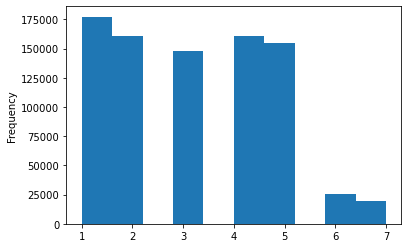

In [110]:
df_logins['day'].plot.hist()
plt.show()

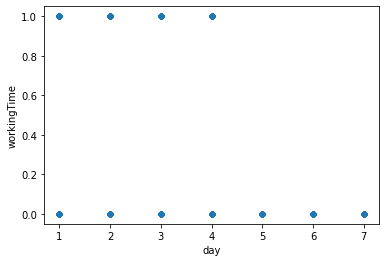

In [123]:
df_logins.plot(x = 'day', y = 'workingTime', kind = 'scatter')
plt.show()

Every log between Friday and Sunday occurred outside working time

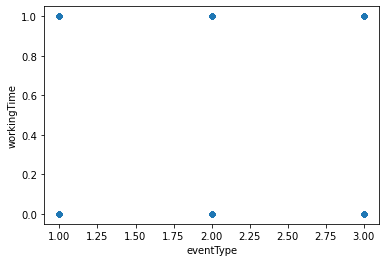

In [124]:
df_logins.plot(x = 'eventType', y = 'workingTime', kind = 'scatter')
plt.show()

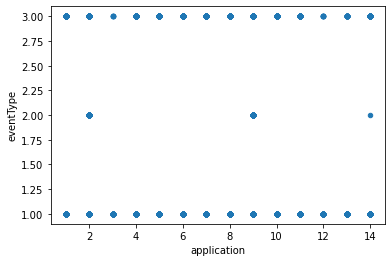

In [113]:
df_logins.plot(x = 'application', y = 'eventType', kind = 'scatter')
plt.show()

Failed logins attempts occurred only for application ERM (2), HRW(9) and TM3(14) 

### Users dataframe construction

In [114]:
# group by the userId
df_groupbyUserId = df_.groupby('userId')

In [115]:
users_id = []
for key, value in df_groupbyUserId:
    users_id.append(key)

# user_id - value 
usersdIpAmount = df_groupbyUserId["ip"].nunique()

# user_id - value
failedAttemps = {}
successAttemps = {}
logoutAmount = {}
avgLoginLogout = {}
avgTimeBtwLogin = {}
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    
    ctr = user_group[user_group["eventType"] == 2].count()
    failedAttemps[i] = ctr["eventType"]
    ctr = user_group[user_group["eventType"] == 1].count()
    successAttemps[i] = ctr["eventType"]
    ctr = user_group[user_group["eventType"] == 3].count()
    logoutAmount[i] = ctr["eventType"]
    
#avarage loginLogout 
for key,value in successAttemps.items():
    avgLoginLogout[key] = 0 if(key not in logoutAmount or logoutAmount[key] == 0 ) else  value/logoutAmount[key]
    
# avarage time between two consecutive login
from datetime import datetime
avgTimeBtwLoginErr = {}
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    delta_sum = 0
    rowsNumber = len(user_group.index)
    ctr = 0
    for j in range(rowsNumber - 1):
        #k = j
        if user_group.iloc[j]["eventType"] == 2:
            k = j+1            
            while user_group.iloc[k]["eventType"] != 2 and k < (rowsNumber - 1):
                k += 1
            if k == 1 or k != rowsNumber - 1:
                delta_sum += (user_group.iloc[k]["date"] - user_group.iloc[j]["date"]).total_seconds() * 1000
                ctr += 1
            j = k
            
    if ctr != 0:
        avgTimeBtwLoginErr[i] = int(delta_sum/ctr)
    else:
        avgTimeBtwLoginErr[i] = 0


In [116]:
# setting up 2nd dataset
df_users = pd.DataFrame(columns=["userId","usedIpAmount","avgTimeBtwLoginErr",
                                 "failedAttemps","successAttemps","logoutAmount","avgLoginLogout"])
df_users["userId"] = users_id
df_users["usedIpAmount"] = usersdIpAmount.values
df_users["failedAttemps"] = failedAttemps.values()
df_users["successAttemps"] = successAttemps.values()
df_users["logoutAmount"] = logoutAmount.values()
df_users["avgLoginLogout"] = avgLoginLogout.values()
df_users["avgTimeBtwLoginErr"] = avgTimeBtwLoginErr.values()

df_users

,userId,usedIpAmount,avgTimeBtwLoginErr,failedAttemps,successAttemps,logoutAmount,avgLoginLogout
0,1,2,0,1,9677,0,0.000000
1,10,2,12256585000,2,0,0,0.000000
2,17,1,931113250,9,9,0,0.000000
3,18,1,12000,4,0,0,0.000000
4,21,6,4000,2,28,18,1.555556
...,...,...,...,...,...,...,...
18075,33952,1,0,0,1,0,0.000000
18076,33953,1,0,0,1,0,0.000000
18077,33954,1,0,0,1,0,0.000000
18078,33961,1,0,0,1,0,0.000000


In [117]:
df_users["avgTimeBtwLoginErr"].describe()

count    1.808000e+04
mean     6.491139e+08
std      2.027872e+09
min      0.000000e+00
25%      0.000000e+00
50%      1.043180e+05
75%      6.120628e+08
max      4.785448e+10
Name: avgTimeBtwLoginErr, dtype: float64

#### Plotting

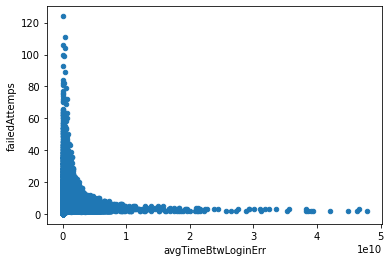

In [118]:
df_users.plot(x = 'avgTimeBtwLoginErr', y = 'failedAttemps', kind = 'scatter')
plt.show()

When the number of login errors increases the average time interval between two consecutive login attempts narrows

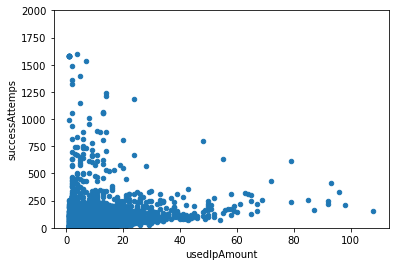

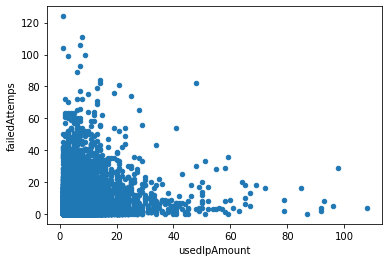

In [119]:
#amount of used IP addresses and success log in attempts
df_users.plot(x = 'usedIpAmount', y = 'successAttemps', kind = 'scatter')
plt.ylim(0,2000)
plt.show()
#amount of used IP addresses and failure login attempts
df_users.plot(x = 'usedIpAmount', y = 'failedAttemps', kind = 'scatter')
plt.show()

From the graphs above we can deduce that for a low amount of used IP it is most likely that a user will carry out the login attempt successfully. Thus, if a user attempts to log in using different a different IP seriese can be considered suspicious.

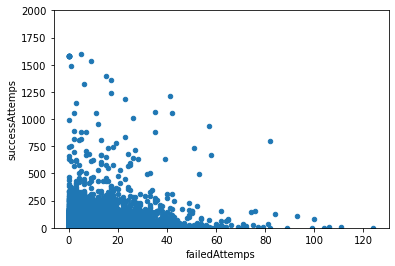

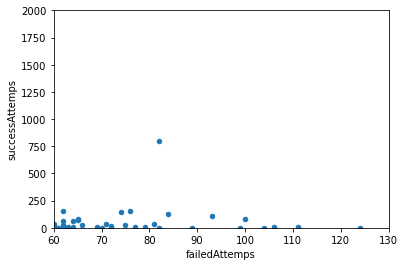

In [133]:
df_users.plot(x = 'failedAttemps', y = 'successAttemps', kind = 'scatter')
plt.ylim(0,2000)
plt.show()

df_users.plot(x = 'failedAttemps', y = 'successAttemps', kind = 'scatter')
plt.ylim(0,2000)
plt.xlim(60,130)
plt.show()

Relying on the graph we can observe the presence of users who have mainly performed log-in attempts erroneously.

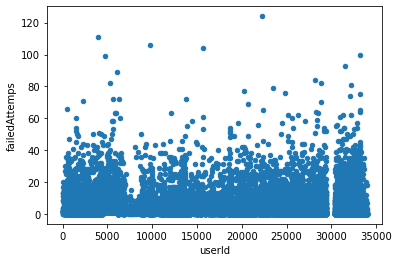

In [130]:
df_users.plot(x = 'userId', y = 'failedAttemps', kind = 'scatter')
plt.show()

Here, looking at the graph, we can deduce the presence of users being much further from the average of log-in failed attempts.

## Clustering

<p>We take an unsupervised approach to find outliers according to the analysis carried out so far. 
Thanks to the two dataframes built up, <span style="text-decoration: underline;">we will be looking for outliers for both: log-in attempts and users.</span> </p>

In [122]:
print(df_groupbyUserId["userId"])

### Log-in attempts

### Users